In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('../DATA/cancer_classification.csv')

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


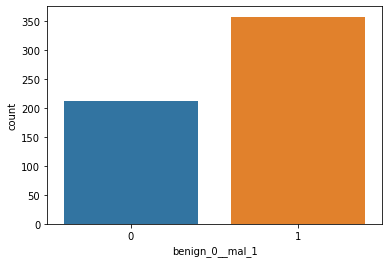

In [7]:
#For classification its always good to check countplot
sns.countplot(x='benign_0__mal_1',data=df)

There is more mal data in the dataset but its not that bad. Difference is not that extreme. Let's check correalation next

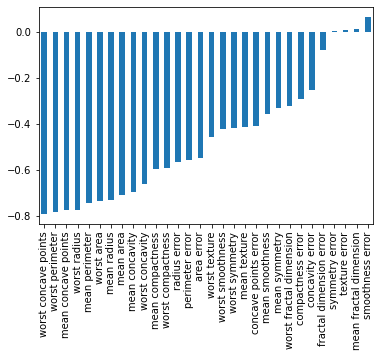

In [12]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

We seems to have very highly negatively correlated features.

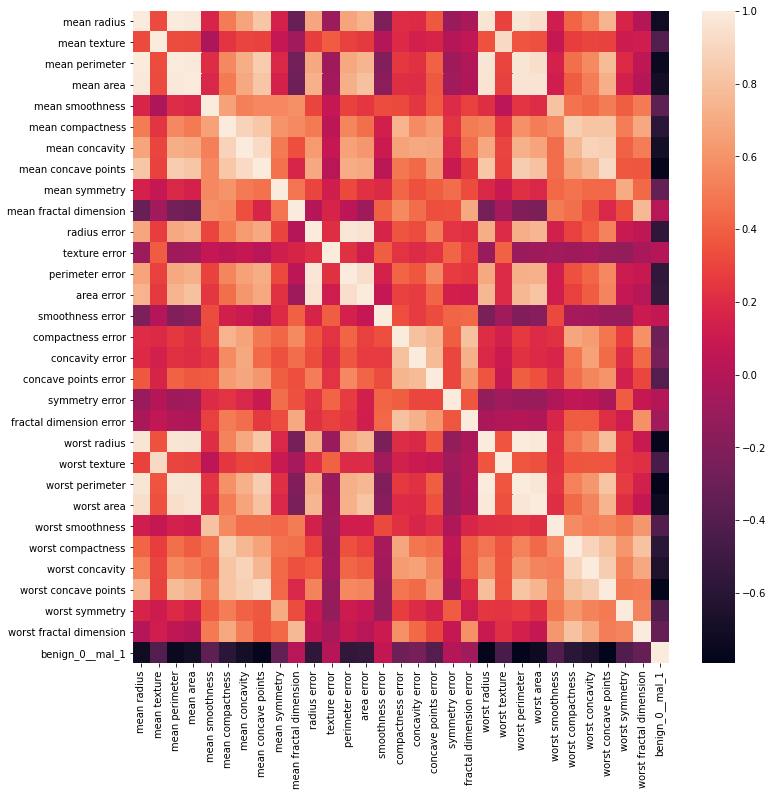

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

## Train and test split

In [15]:
X= df.drop('benign_0__mal_1',axis=1).values
y= df['benign_0__mal_1'].values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [18]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
X_train=scaler.fit_transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

## Model fitting

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [23]:
X_train.shape

(426, 30)

In [24]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [25]:
model.fit(x=X_train,y=y_train,
          epochs=600,validation_data=(X_test,y_test)
         )

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6913 - val_loss: 0.6771
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6660 - val_loss: 0.6530
Epoch 3/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6372 - val_loss: 0.6225
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6025 - val_loss: 0.5875
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5664 - val_loss: 0.5478
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5283 - val_loss: 0.5092
Epoch 7/600
14/14 [==============================] - 0s 1ms/step - loss: 0.4865 - val_loss: 0.4635
Epoch 8/600
14/14 [==============================] - 0s 1ms/step - loss: 0.4394 - val_loss: 0.4131
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3914 - val_loss: 0.3641
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3448 - val_loss: 0.3160
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.1124
Epoch 84/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0507 - val_loss: 0.1119
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.1157
Epoch 86/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0520 - val_loss: 0.1131
Epoch 87/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0499 - val_loss: 0.1254
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.1153
Epoch 89/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0501 - val_loss: 0.1129
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0498 - val_loss: 0.1139
Epoch 91/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0506 - val_loss: 0.1164
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0488 - val_loss: 0.1148
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0359 - val_loss: 0.1363
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0323 - val_loss: 0.1326
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0320 - val_loss: 0.1294
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0324 - val_loss: 0.1364
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0327 - val_loss: 0.1255
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0310 - val_loss: 0.1472
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0339 - val_loss: 0.1268
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0319 - val_loss: 0.1336
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0334 - val_loss: 0.1488
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0352 - val_loss: 0.1282
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0234 - val_loss: 0.1634
Epoch 408/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0232 - val_loss: 0.1736
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0210 - val_loss: 0.1575
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0181 - val_loss: 0.1799
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0186 - val_loss: 0.1582
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0204 - val_loss: 0.1768
Epoch 413/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0200 - val_loss: 0.1727
Epoch 414/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0193 - val_loss: 0.1653
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0180 - val_loss: 0.1698
Epoch 416/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0196 - val_loss: 0.1647
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.2361
Epoch 569/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0106 - val_loss: 0.2359
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0094 - val_loss: 0.2206
Epoch 571/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.2243
Epoch 572/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.2244
Epoch 573/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0103 - val_loss: 0.2314
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.2271
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.2301
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.2212
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.2285
Epoc

In [29]:
losses = pd.DataFrame(model.history.history)

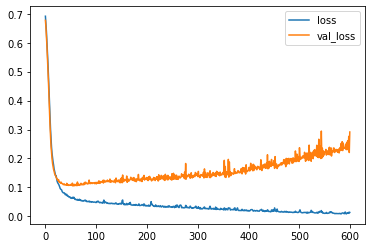

In [30]:
losses.plot()

It is perfect example of overfitting. It is decreasing its loss but increasing in validation. We need to stop the epochs before its getting overfitted.

In [31]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantit

In [34]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=25)

In [35]:
model.fit(x=X_train,y=y_train,
          epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop]
         )

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6831 - val_loss: 0.6619
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6501 - val_loss: 0.6321
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6139 - val_loss: 0.5883
Epoch 4/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5690 - val_loss: 0.5413
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5237 - val_loss: 0.4934
Epoch 6/600
14/14 [==============================] - 0s 1ms/step - loss: 0.4758 - val_loss: 0.4476
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4332 - val_loss: 0.4014
Epoch 8/600
14/14 [==============================] - 0s 1ms/step - loss: 0.3905 - val_loss: 0.3601
Epoch 9/600
14/14 [==============================] - 0s 1ms/step - loss: 0.3526 - val_loss: 0.3245
Epoch 10/600
14/14 [==============================] - 0s 1ms/step - loss: 0.3194 - val_loss: 0.2927
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.1185
Epoch 84/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0567 - val_loss: 0.1124
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.1273
Epoch 86/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0567 - val_loss: 0.1166
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0562 - val_loss: 0.1179
Epoch 00087: early stopping


In [36]:
model_loss = pd.DataFrame(model.history.history)

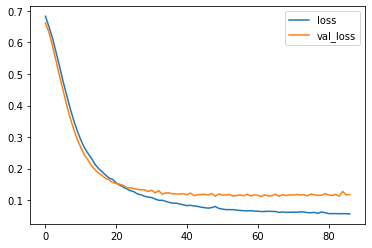

In [37]:
model_loss.plot()

In [39]:
#adding dropout layer - turn off neurons randomly by rate
from tensorflow.keras.layers import Dropout

In [40]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(15,activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [41]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=25)

In [42]:
model.fit(x=X_train,y=y_train,
          epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop]
         )

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6762 - val_loss: 0.6335
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6397 - val_loss: 0.5975
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6026 - val_loss: 0.5605
Epoch 4/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5623 - val_loss: 0.5219
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5290 - val_loss: 0.4783
Epoch 6/600
14/14 [==============================] - 0s 1ms/step - loss: 0.4914 - val_loss: 0.4380
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4683 - val_loss: 0.3957
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4279 - val_loss: 0.3595
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4078 - val_loss: 0.3311
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3915 - val_loss: 0.3021
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0853 - val_loss: 0.0946
Epoch 84/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0828 - val_loss: 0.1026
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0752 - val_loss: 0.0964
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0685 - val_loss: 0.0960
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0911 - val_loss: 0.1016
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0831 - val_loss: 0.0973
Epoch 89/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0817 - val_loss: 0.1067
Epoch 90/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0804 - val_loss: 0.0959
Epoch 91/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0721 - val_loss: 0.0971
Epoch 92/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0784 - val_loss: 0.0997
Epoch 93/600


In [43]:
model_loss = pd.DataFrame(model.history.history)

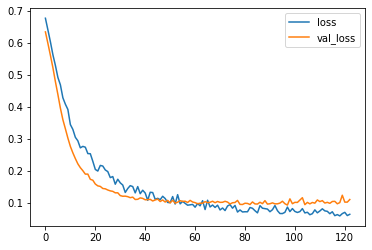

In [44]:
model_loss.plot()

This is much more improved model comparing to first model.

In [46]:
predictions=model.predict_classes(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



[[54  1]
 [ 3 85]]
